## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape
#There are 1338 rows and 7 columns

(1338, 7)

In [5]:
df.info()
#The datas are in correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Cleaning

In [6]:
for i in df.columns:
    print(i)
    print(sorted(df[i].unique()))
#There are no garbage datas

age
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
sex
['female', 'male']
bmi
[15.96, 16.815, 17.195, 17.29, 17.385, 17.4, 17.48, 17.67, 17.765, 17.8, 17.86, 17.955, 18.05, 18.3, 18.335, 18.5, 18.6, 18.715, 18.905, 19.0, 19.095, 19.19, 19.3, 19.475, 19.57, 19.8, 19.855, 19.95, 20.045, 20.1, 20.13, 20.235, 20.3, 20.35, 20.4, 20.425, 20.52, 20.6, 20.615, 20.7, 20.79, 20.8, 20.9, 21.01, 21.09, 21.12, 21.28, 21.3, 21.375, 21.4, 21.47, 21.5, 21.56, 21.565, 21.66, 21.7, 21.755, 21.78, 21.8, 21.85, 21.89, 21.945, 22.0, 22.04, 22.1, 22.135, 22.22, 22.23, 22.3, 22.42, 22.515, 22.6, 22.61, 22.705, 22.77, 22.8, 22.88, 22.895, 22.99, 23.0, 23.085, 23.1, 23.18, 23.2, 23.21, 23.275, 23.3, 23.32, 23.37, 23.4, 23.465, 23.54, 23.56, 23.6, 23.65, 23.655, 23.7, 23.75, 23.76, 23.8, 23.845, 23.87, 23.9, 23.94, 23.98, 24.035, 24.09, 24.1, 24.13, 24.225, 24.3, 24.31, 2

<Axes: >

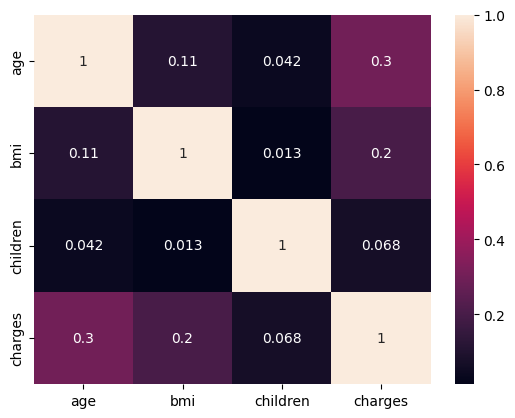

In [7]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Missing values

In [8]:
df.isna().sum().sum()
#There are no missing values

0

## Encoding

In [9]:
numcols=df.select_dtypes(exclude='O').columns
catcols=df.select_dtypes(include='O').columns
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcols]=pd.DataFrame(oe.fit_transform(df[catcols]),columns=catcols)

## Outliers

In [10]:
z=(df[numcols]-df[numcols].mean())/df[numcols].std()
id_outliers=np.where((z<-3)|(z>3))[0]

In [11]:
len(id_outliers)
#There are 29 outliers

29

In [12]:
df2=df.drop(index=id_outliers)
#Removing outliers
df2.shape

(1309, 7)

In [13]:
df2.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Train-Test split

In [14]:
y=df2['charges']
X=df2.drop(columns='charges')

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [34]:
X_test

,age,sex,bmi,children,smoker,region
295,18,1.0,22.990,0,0.0,0.0
422,40,1.0,32.775,1,1.0,0.0
803,18,0.0,42.240,0,1.0,2.0
43,37,0.0,30.800,2,0.0,2.0
1092,23,1.0,32.700,3,0.0,3.0
...,...,...,...,...,...,...
992,50,0.0,31.600,2,0.0,3.0
787,21,1.0,36.860,0,0.0,1.0
610,47,0.0,29.370,1,0.0,2.0
533,37,1.0,36.190,0,0.0,2.0


In [38]:
X_test

,age,sex,bmi,children,smoker,region
295,18,1.0,22.990,0,0.0,0.0
422,40,1.0,32.775,1,1.0,0.0
803,18,0.0,42.240,0,1.0,2.0
43,37,0.0,30.800,2,0.0,2.0
1092,23,1.0,32.700,3,0.0,3.0
...,...,...,...,...,...,...
992,50,0.0,31.600,2,0.0,3.0
787,21,1.0,36.860,0,0.0,1.0
610,47,0.0,29.370,1,0.0,2.0
533,37,1.0,36.190,0,0.0,2.0


In [39]:
y_train

1331    10795.93733
256     43921.18370
1024     8569.86180
262     24869.83680
416      9140.95100
           ...     
615     42969.85270
474     25382.29700
218      3392.97680
980     25517.11363
1203     9964.06000
Name: charges, Length: 981, dtype: float64

In [40]:
y_test

295      1704.56810
422     39125.33225
803     38792.68560
43       6313.75900
1092     3591.48000
           ...     
992     10118.42400
787      1917.31840
610      8547.69130
533     19214.70553
241      5354.07465
Name: charges, Length: 328, dtype: float64

## Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7044006584530671

In [21]:
model.intercept_

-11860.164546986061

In [22]:
model.coef_

array([  251.84820064,  -229.84199812,   338.94716294,   538.13810119,
       23577.48013561,  -330.43658965])